In [2]:
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

--2023-07-12 13:51:04--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.4'

grades.csv.4        100%[===================>]     322  --.-KB/s    in 0s      

2023-07-12 13:51:04 (11.8 MB/s) - 'grades.csv.4' saved [322/322]



,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


/var/folders/k8/3r4jjqb143s9zr6tdrf9zrgh0000gn/T/ipykernel_10402/286884791.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


<bound method Figure.show of <Figure size 1000x400 with 2 Axes>>

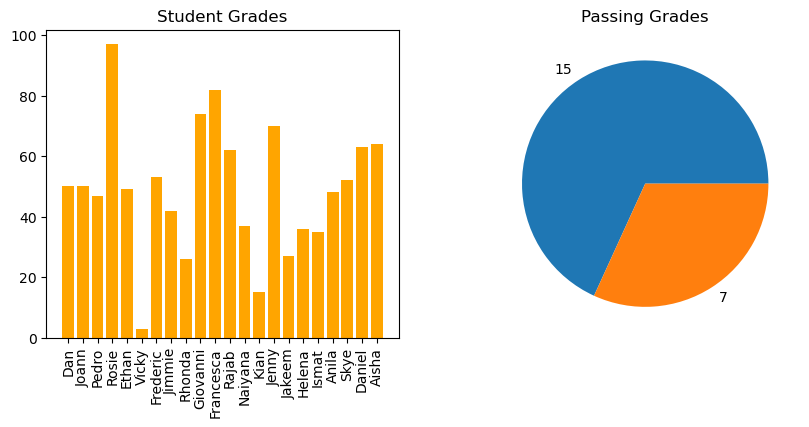

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

passes_count = df_students.Pass.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title('Passing Grades')

fig.show

<Axes: xlabel='Name'>

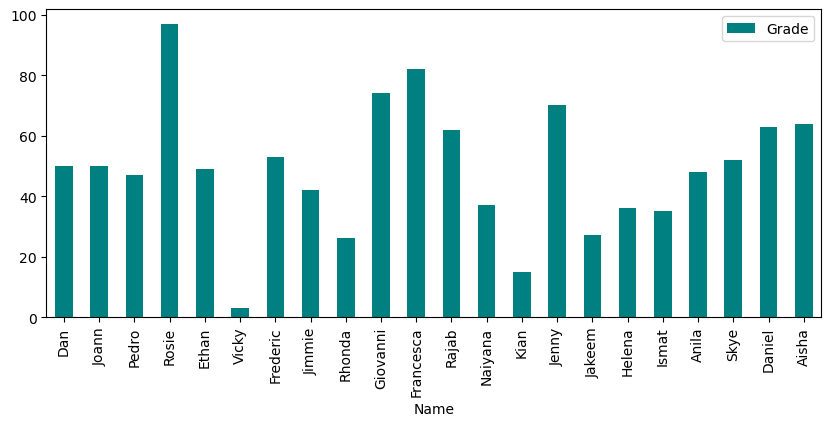

In [15]:
df_students.plot.bar(x='Name', y='Grade', figsize=(10,4), color='teal')

Minimum: 3.0
Maximum: 97.0
Median: 49.5
Mode: 50.0


<bound method Figure.show of <Figure size 1000x400 with 1 Axes>>

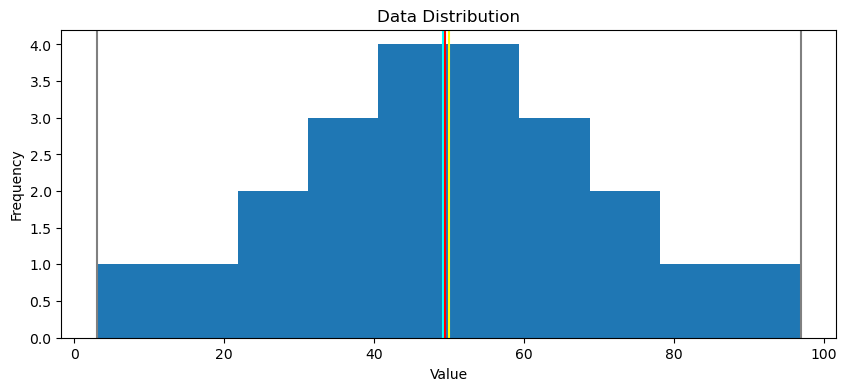

In [18]:
grades = df_students.Grade

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
med_val = df_students.Grade.median()
mode_val = df_students.Grade.mode()[0]

print(f'Minimum: {min_val}\nMaximum: {max_val}\nMedian: {med_val}\nMode: {mode_val}')

fig = plt.figure(figsize=(10,4))

plt.hist(grades)

plt.axvline(x=min_val, color='gray')
plt.axvline(x=max_val, color='gray')
plt.axvline(x=mean_val, color='cyan')
plt.axvline(x=med_val, color='red')
plt.axvline(x=mode_val, color='yellow')

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show

/var/folders/k8/3r4jjqb143s9zr6tdrf9zrgh0000gn/T/ipykernel_10402/3285957670.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


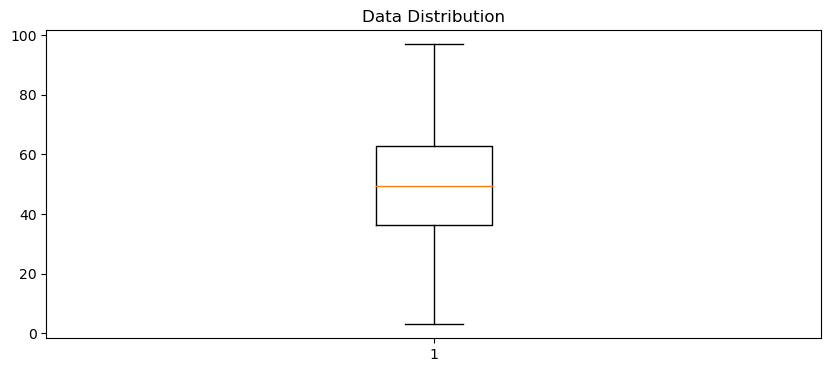

In [19]:
grades = df_students.Grade

fig = plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title('Data Distribution')

fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



/var/folders/k8/3r4jjqb143s9zr6tdrf9zrgh0000gn/T/ipykernel_10402/1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


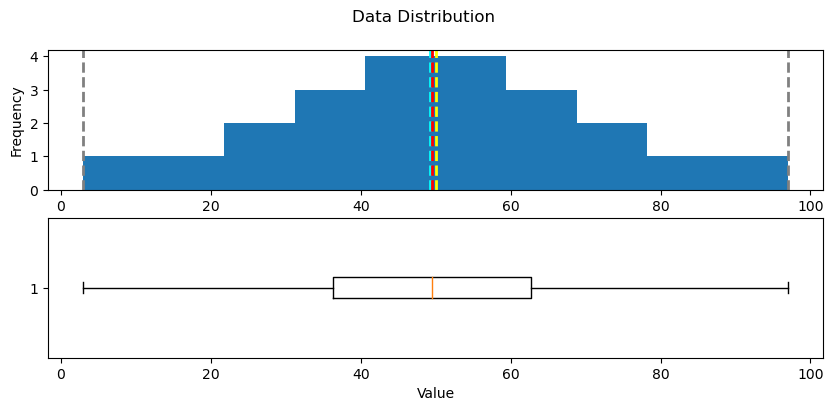

In [20]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

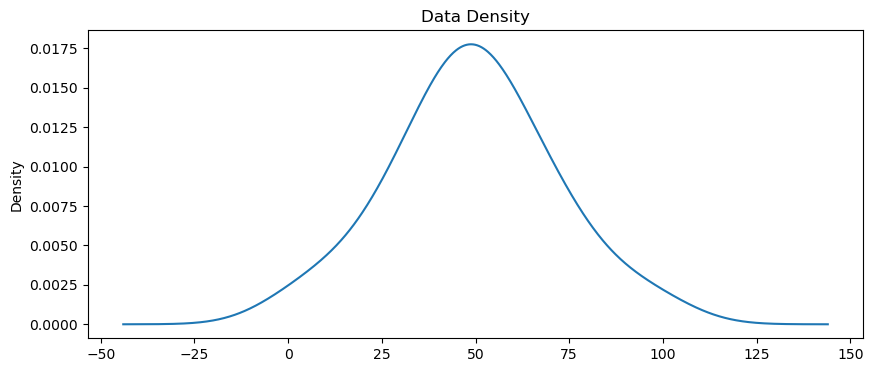

In [26]:
def show_density(data):
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(10,4))

    data.plot.density()
    plt.title('Data Density')
    plt.show()

show_density(df_students.Grade)